<a href="https://colab.research.google.com/github/sumanhasgal/special-winner/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

### ***importing libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/eda capstone/Global Terrorism Analysis/Global Terrorism Data.csv', encoding ='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
data=data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Weapon_type','Motive']]

In [9]:
data.head()

Year  Month  Day             Country    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group Weapon_type Motive  
0                              MANO-D     Unknown    NaN  
1  23rd of September Communist League     Unknown    NaN  
2                             Unknown     Unknown    NaN  
3                             Unknown  Explosives    NaN  
4                             Unknown  Incendiary    NaN

# Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6f5d4d6d0>,
      dtype=object)

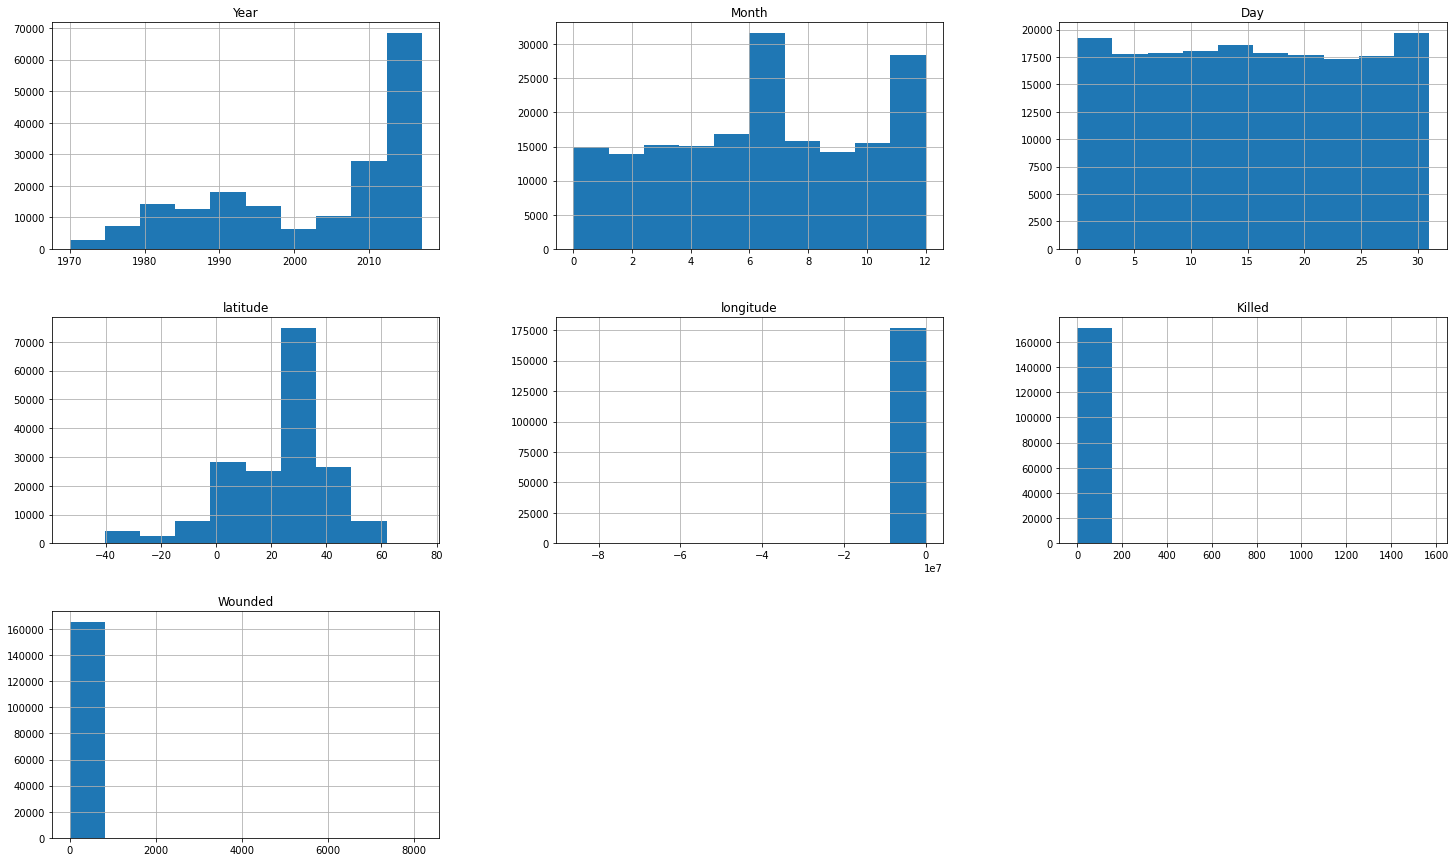

In [10]:
data.hist(figsize=(25,15))

In [11]:
data.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

# Correction Analysis

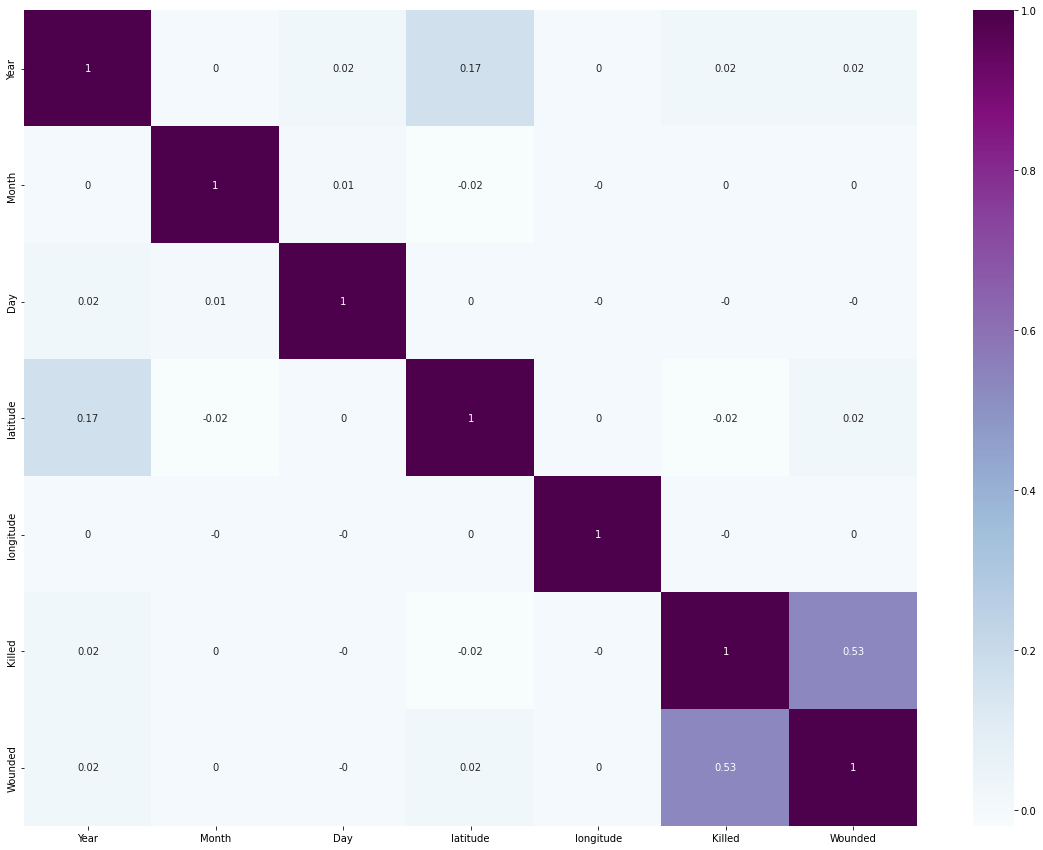

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(np.round(data.corr(),2),annot=True, cmap='BuPu')

# Terrorist Activities by region in each year through plot

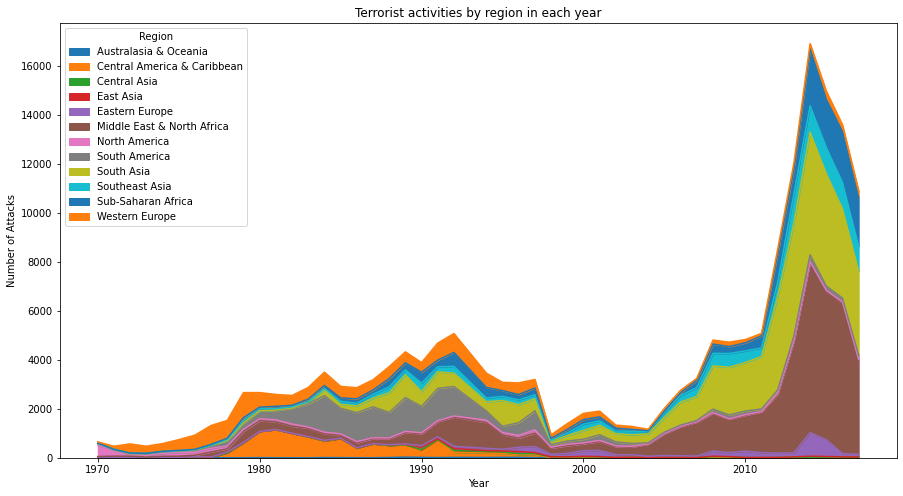

In [13]:
pd.crosstab(data.Year,data.Region).plot(kind='area',figsize=(15,8))
plt.title('Terrorist activities by region in each year')
plt.ylabel('Number of Attacks')
plt.show()

Terrorist activites each year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


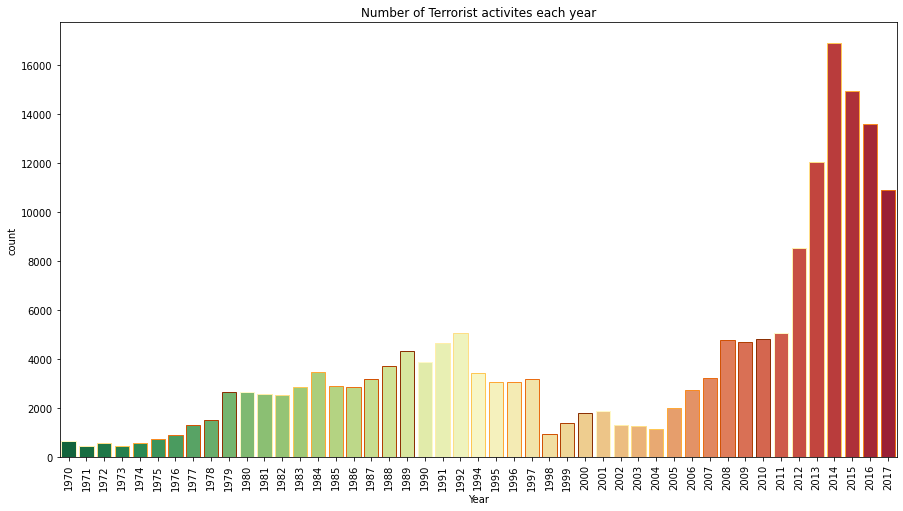

In [14]:
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=data,palette = 'RdYlGn_r',edgecolor=sns.color_palette('YlOrBr',10))
plt.xticks(rotation = 90)
plt.title('Number of Terrorist activites each year')
plt.show()

2014 and 2015 have large number of terrorist activites

Terrorist attack percentage from 1970 to 2017

In [15]:
Year=data.Year.value_counts().to_dict()
rate = ((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 where as in 2017 ',Year[2017],'attacks were happened')
print('The number of attacks were increased by ',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 where as in 2017  10900 attacks were happened
The number of attacks were increased by  94.0 % till 2017


People died and wounded in attacks in each country in each year

In [16]:
px.scatter(data,data.Wounded,data.Killed,hover_name = 'Country',animation_frame='Year',animation_group = 'Country',color='AttackType',range_color =[0,1],
          labels={'Killed':'Deaths','Wounded':'Casualties'},
          title= 'Number of casualties vs killed people in each country for each year')

In [46]:
df = data.groupby(['Country'],as_index=False).count()

In [47]:
fig = px.treemap(df, values='Wounded',
                 path=['Region','AttackType'],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Treemap Chart: Grouping the Type of Attacks in Different Regions')
fig.show()

In [48]:
fig = px.sunburst(df, values='Killed',
                 path=['Region','AttackType'],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Sunburst Chart: Grouping the Type of Attacks in Different Regions')
fig.show()

Method of Attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



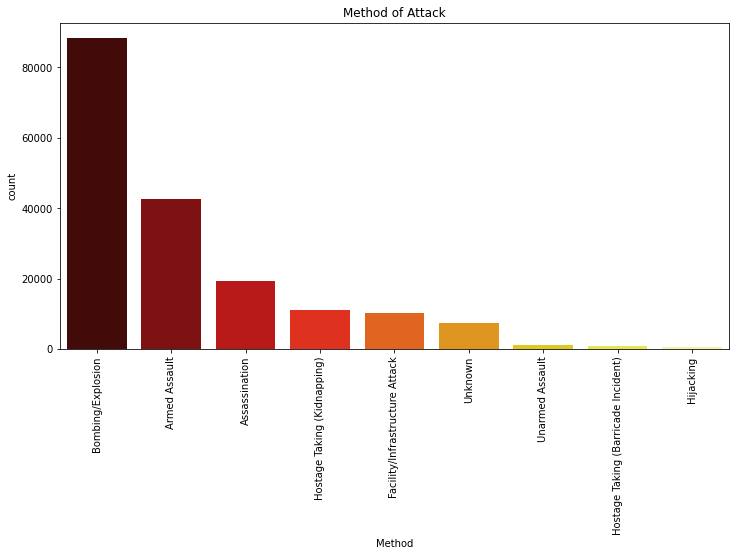

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data['AttackType'],order=data['AttackType'].value_counts().index,palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

Bombing/Explosion is mostly used in terrorist attack

# Total no of attack in each country and region

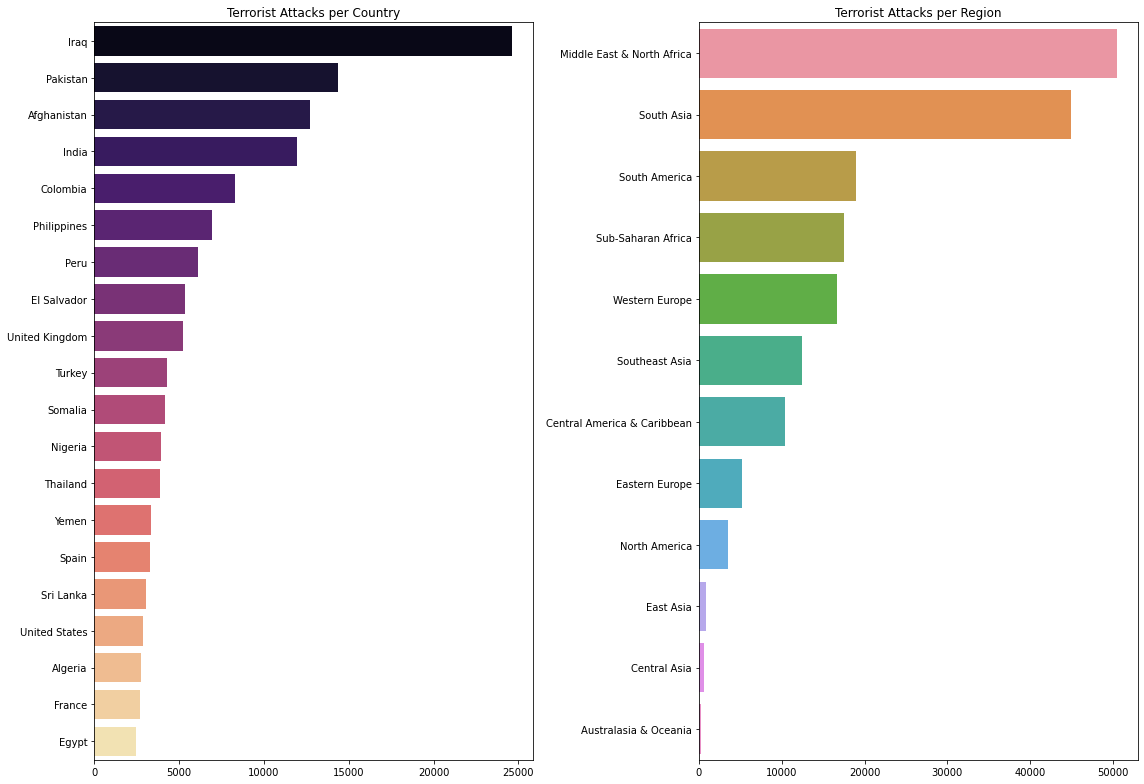

In [18]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = data['Country'].value_counts()[:20].values, y = data['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=data['Region'].value_counts().values,y=data['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

# *Number of attacks in countries using globe*

In [49]:
fig=px.choropleth(df,locations='Country',locationmode='country names',color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

In [50]:
fig=px.choropleth(df,locations='Country',locationmode='country names',color='Year',hover_name='Country',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

# Country suffered maximum attacks and minimum attack

In [31]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]

In [32]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


which terrorist organizations have carried out their operations in each country.

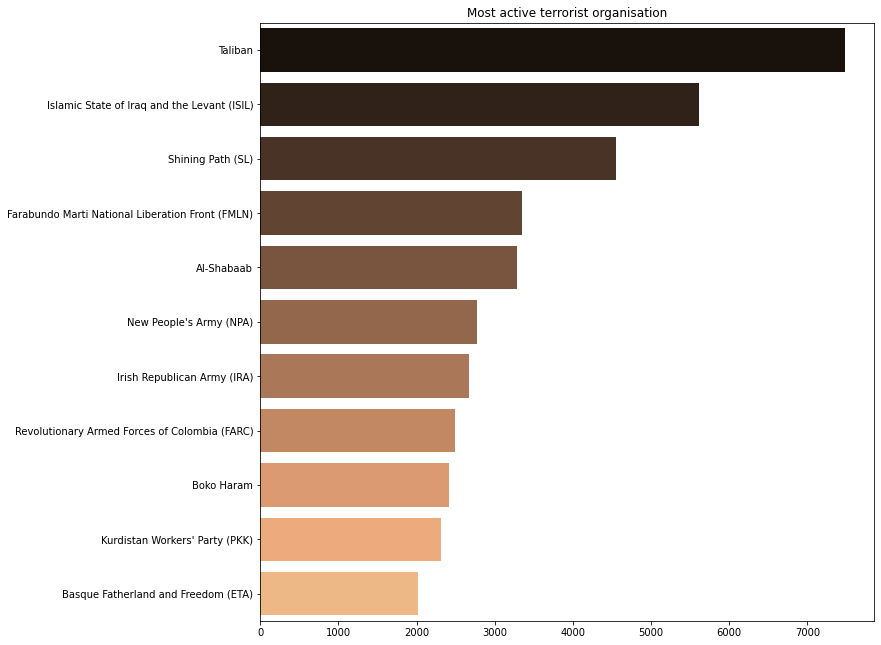

In [34]:
plt.subplots(figsize=(11,11))
sns.barplot(y=data['Group'].value_counts()[1:12].index,x=data['Group'].value_counts()[1:12].values,palette='copper')
plt.title('Most active terrorist organisation')
plt.show()

 Before and after the War on Terror

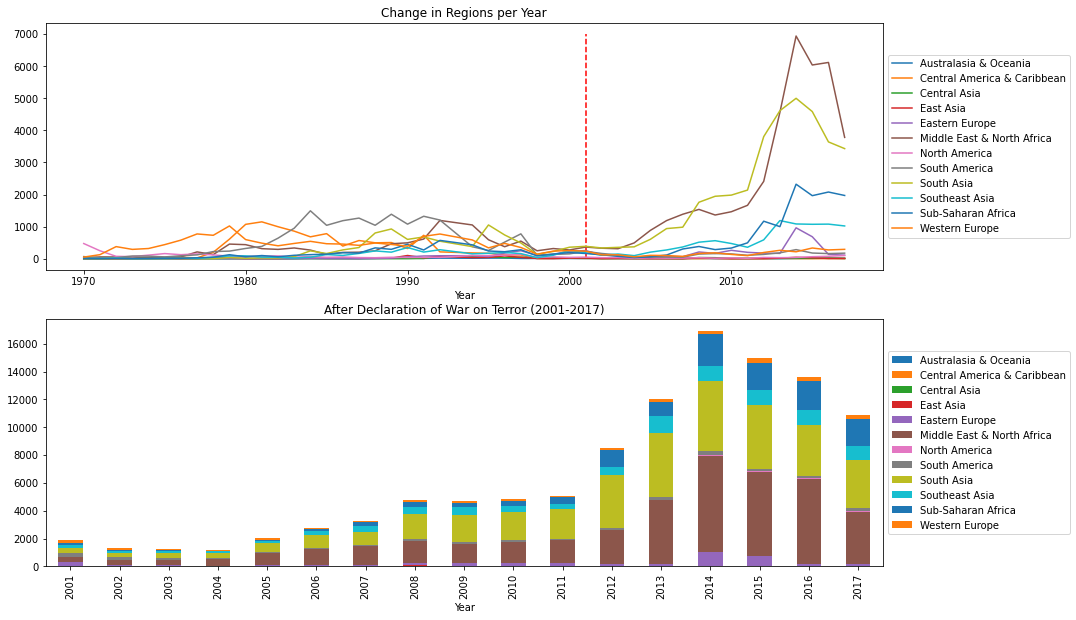

In [45]:
data_after = data[data['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(data.Year,data.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()


By noticing the first plot we can see terror activities widely spread in all regions. But in 2000 we can see decrese in terror activity by dropping to minimum.After 2001 there is considerably increase in terror activities in middle east and south Asia and in Sub Saharan region.**

# Key findings from the EDA




1.  Iraq has the most terror attacks.
2.  Middle East and North Africa has the highest terror attacks in region.

1.  Taliban is most active terrorist organisation.
2.  In 2014 and 2015 have large number of terrorist activites.

1.  Most method of attack is bombing and explosion.
2.  There are maximum number of attacks in Private citizens and Property.









